
<h1 style="color: blue; text-align: center; font-size: 25px;"><b>Hand Gesture Recognition using Transfer Learning</b></h1>
<h1 style="color: blue; text-align: center; font-size: 20px;"><b>Using Transfer Learning</b></h1>

In [ ]:
Problem Description :


In [177]:
import numpy as np
import cv2

import PIL.Image as Image
import os
import PIL
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [179]:
import warnings
tf.get_logger().setLevel('ERROR')
warnings.filterwarnings('ignore')

In [181]:

IMAGE_SHAPE = (224, 224)

# Load the MobileNetV2 model from TensorFlow Hub
classifier = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",
    input_shape=IMAGE_SHAPE + (3,)
)

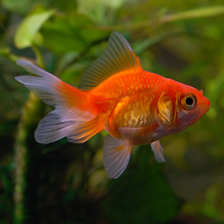

In [22]:
Gold_fish=Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
Gold_fish

In [30]:
Gold_fish=np.array(Gold_fish)/255.0
Gold_fish.shape

(224, 224, 3)

In [32]:
Gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [40]:
Gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [46]:
classifier(Gold_fish[np.newaxis, ...]).shape

TensorShape([1, 1001])

In [48]:
result=classifier(Gold_fish[np.newaxis, ...])

In [50]:
predicted_label_index=np.argmax(result)
predicted_label_index

2

In [64]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [66]:
image_labels[predicted_label_index]

'goldfish'

In [183]:
train_dir = "archive (1)/train/train"
test_dir = "archive (1)/test/test"

In [185]:
import pathlib
train_dir =  pathlib.Path(train_dir)
test_dir = pathlib.Path(test_dir)

In [189]:
list(train_dir.glob('*/*.jpg'))[:5]

[WindowsPath('archive (1)/train/train/0/1.jpg'),
 WindowsPath('archive (1)/train/train/0/10.jpg'),
 WindowsPath('archive (1)/train/train/0/100.jpg'),
 WindowsPath('archive (1)/train/train/0/101.jpg'),
 WindowsPath('archive (1)/train/train/0/102.jpg')]

In [191]:
list(test_dir.glob('*/*.jpg'))[:5]

[WindowsPath('archive (1)/test/test/0/1000.jpg'),
 WindowsPath('archive (1)/test/test/0/1001.jpg'),
 WindowsPath('archive (1)/test/test/0/1002.jpg'),
 WindowsPath('archive (1)/test/test/0/1003.jpg'),
 WindowsPath('archive (1)/test/test/0/1004.jpg')]

In [193]:
image_count = len(list(train_dir.glob('*/*.jpg')))
print(image_count)

18000


In [195]:
image_count_test = len(list(test_dir.glob('*/*.jpg')))
print(image_count_test)

6000


In [197]:
ten = list(train_dir.glob('10/*'))
ten[:5]

[WindowsPath('archive (1)/train/train/10/1.jpg'),
 WindowsPath('archive (1)/train/train/10/10.jpg'),
 WindowsPath('archive (1)/train/train/10/100.jpg'),
 WindowsPath('archive (1)/train/train/10/101.jpg'),
 WindowsPath('archive (1)/train/train/10/102.jpg')]

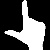

In [199]:
PIL.Image.open(str(ten[1]))

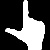

In [90]:
PIL.Image.open(str(ten[6]))

In [201]:
twelve = list(train_dir.glob('12/*'))
twelve[:5]

[WindowsPath('archive (1)/train/train/12/1.jpg'),
 WindowsPath('archive (1)/train/train/12/10.jpg'),
 WindowsPath('archive (1)/train/train/12/100.jpg'),
 WindowsPath('archive (1)/train/train/12/101.jpg'),
 WindowsPath('archive (1)/train/train/12/102.jpg')]

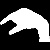

In [94]:
PIL.Image.open(str(twelve[6]))

In [229]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Ensure validation split is included
    rotation_range=20,      # Rotate images randomly
    width_shift_range=0.2,  # Shift images horizontally
    height_shift_range=0.2, # Shift images vertically
    shear_range=0.2,        # Shear transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Flip images horizontally
    fill_mode='nearest'     # Fill missing pixels
)


# Load train data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # MobileNet input size
    batch_size=32,
    class_mode='categorical'  # Use 'binary' for 2 classes
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print("Train and Test data loaded successfully!")


Found 18000 images belonging to 20 classes.
Found 6000 images belonging to 20 classes.
Train and Test data loaded successfully!


In [231]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Ensure validation split is included
    rotation_range=20,      # Rotate images randomly
    width_shift_range=0.2,  # Shift images horizontally
    height_shift_range=0.2, # Shift images vertically
    shear_range=0.2,        # Shear transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Flip images horizontally
    fill_mode='nearest'     # Fill missing pixels
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify this for the training subset
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify this for the validation subset
)


Found 14400 images belonging to 20 classes.
Found 3600 images belonging to 20 classes.


In [209]:
from tensorflow.keras.preprocessing import image

In [233]:
# Load an image from your dataset
img_path = "archive (1)/test/test/12/1004.jpg"  # Change to your image path
img = image.load_img(img_path, target_size=IMAGE_SHAPE)
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions

# Predict class
predictions = classifier(img_array)
predicted_class = np.argmax(predictions)

print(f"Predicted Class ID: {predicted_class}")

Predicted Class ID: 882


In [235]:
# Define the MobileNetV2 model from Keras (pre-trained on ImageNet)
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

In [237]:
# Freeze the base model to avoid training it
base_model.trainable = False

# Define the input layer
input_layer = tf.keras.Input(shape=(224, 224, 3))


In [239]:
# Add a new classification head for hand gestures
num_classes = 20  # Update this based on your dataset


In [241]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,  Input
from tensorflow.keras import layers, models

In [245]:
# Build the model
input_layer = base_model.input
x = layers.GlobalAveragePooling2D()(base_model.output)  # Flatten the features

# Fully Connected Layers with Dropout
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Dropout added here

x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)  # Dropout added here

# Output layer (20 classes, adjust as needed)
output_layer = layers.Dense(20, activation='softmax')(x)

# Create the complete model
model = models.Model(inputs=input_layer, outputs=output_layer)

# Print the model summary
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_11[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,050,324 (11.64 MB)

 Trainable params: 792,340 (3.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [247]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [249]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=4,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/4
450/450 ━━━━━━━━━━━━━━━━━━━━ 916s 2s/step - accuracy: 0.5827 - loss: 1.3101 - val_accuracy: 0.8993 - val_loss: 0.3096
Epoch 2/4
450/450 ━━━━━━━━━━━━━━━━━━━━ 813s 2s/step - accuracy: 0.8936 - loss: 0.3091 - val_accuracy: 0.9503 - val_loss: 0.1493
Epoch 3/4
450/450 ━━━━━━━━━━━━━━━━━━━━ 828s 2s/step - accuracy: 0.9235 - loss: 0.2210 - val_accuracy: 0.9568 - val_loss: 0.1118
Epoch 4/4
450/450 ━━━━━━━━━━━━━━━━━━━━ 743s 2s/step - accuracy: 0.9305 - loss: 0.2071 - val_accuracy: 0.9626 - val_loss: 0.0993


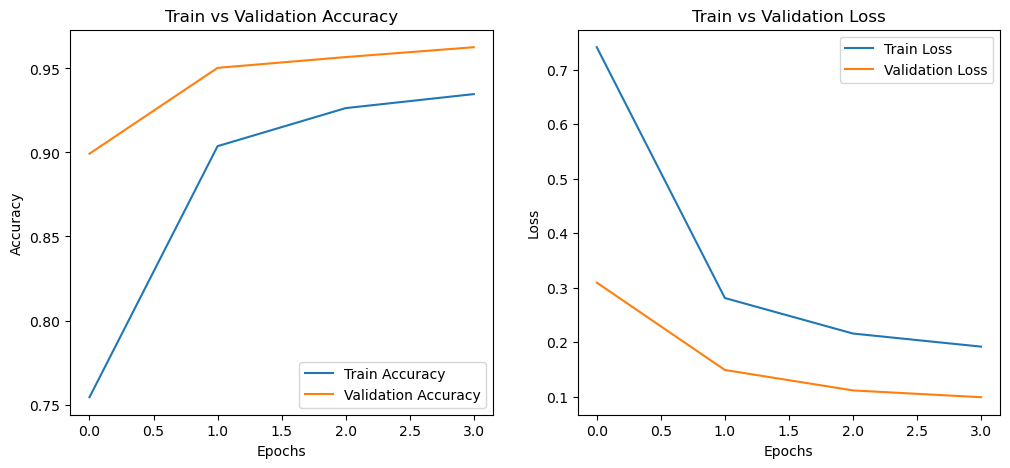

In [251]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')

plt.show()


In [253]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load an image for prediction
img_path = 'four.jpg'  # Replace with your test image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: [14]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


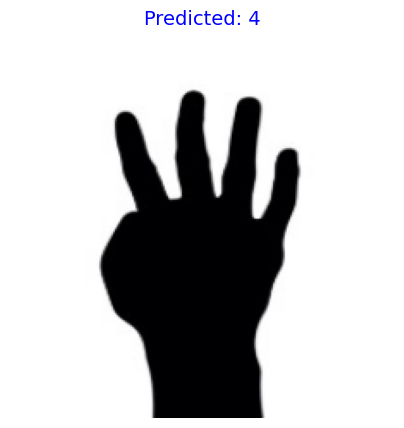

In [259]:
# Load and preprocess the image (same preprocessing as training)
img_path = "four.jpg"  # Replace with the actual path
img = cv2.imread(img_path)  # Read the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
img_resized = cv2.resize(img, (224, 224))  # Resize to MobileNet input size
img_array = np.expand_dims(img_resized, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize (same as training)

# Predict
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get class label
class_indices = train_generator.class_indices
index_to_label = {v: k for k, v in class_indices.items()}  # Reverse dictionary
predicted_label = index_to_label[predicted_class_index]

# Plot the image with prediction
plt.figure(figsize=(5, 5))
plt.imshow(img_resized)
plt.axis("off")
plt.title(f"Predicted: {predicted_label}", fontsize=14, color="blue")
plt.show()

In [283]:
model.save("mobilenet_model.h5")  # Saves the model in HDF5 format
print("Model saved successfully!")


Model saved successfully!


In [285]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("mobilenet_model.h5")
print("Model loaded successfully!")

Model loaded successfully!


In [287]:
# Load and preprocess the image (same preprocessing as training)
img_path = "four.jpg"  # Replace with the actual path
img = cv2.imread(img_path)  # Read the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
img_resized = cv2.resize(img, (224, 224))  # Resize to MobileNet input size
img_array = np.expand_dims(img_resized, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize (same as training)

predictions = loaded_model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_label = index_to_label[predicted_class_index]

print(f"Predicted Class: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: 4
